In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\mesho\\OneDrive\\Desktop\\ML Assignment\\case_time_series.csv")
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
490,3 June 2021,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,4 June 2021,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,5 June 2021,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,6 June 2021,2021-06-06,101209,28909437,174156,27150821,2444,348638


In [4]:
df["Date_YMD"]=pd.to_datetime(df['Date_YMD'])
df.dtypes

Date                       object
Date_YMD           datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

In [5]:
df.drop(['Date'], axis=1,inplace=True)
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,2021-06-06,101209,28909437,174156,27150821,2444,348638


In [6]:
df.rename({'Date_YMD':'Date'}, axis=1, inplace=True)
print(df)

          Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   2020-01-30                1                1                0   
1   2020-01-31                0                1                0   
2   2020-02-01                0                1                0   
3   2020-02-02                1                2                0   
4   2020-02-03                1                3                0   
..         ...              ...              ...              ...   
490 2021-06-03           132424         28573286           206722   
491 2021-06-04           120454         28693740           197763   
492 2021-06-05           114488         28808228           189374   
493 2021-06-06           101209         28909437           174156   
494 2021-06-07            85803         28995240           182866   

     Total Recovered  Daily Deceased  Total Deceased  
0                  0               0               0  
1                  0               0               0  
2     

In [7]:
training_set = df.iloc[0:400, 6].values
training_set = training_set.reshape(-1,1)
np.shape(training_set)

(400, 1)

In [8]:
training_set

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     2],
       [     2],
       [     2],
       [     3],
       [     3],
       [     4],
       [     4],
       [     4],
       [     7],
       [     9],
       [    10],
       [    11],
       [    16],
       [    19],
       [    24

In [9]:
dataset_test = df.iloc[401:451, 3]
dataset_train = df.iloc[0:400, 3]

In [10]:
test_set = df.iloc[401:451, 3].values
np.shape(test_set)

(50,)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) 

In [12]:
X_train = []
y_train = []
for i in range(50, 400):
  X_train.append(training_set_scaled[i-50:i, 0]) 
  y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 

In [13]:
np.shape(y_train)

(350,)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
np.shape(X_train)

(350, 50, 1)

In [15]:
X_train.shape[1], 1

(50, 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [19]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 58ms/step - loss: 0.3095
Epoch 2/100
6/6 [==============================] - 0s 54ms/step - loss: 0.0376
Epoch 3/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0192
Epoch 4/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0207
Epoch 5/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0134
Epoch 6/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0110
Epoch 7/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0103
Epoch 8/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0081
Epoch 9/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0073
Epoch 10/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0070
Epoch 11/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0067
Epoch 12/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0065
Epoch 13/100
6/6 [==============================]

6/6 [==============================] - 0s 65ms/step - loss: 0.0039
Epoch 96/100
6/6 [==============================] - 0s 64ms/step - loss: 0.0040
Epoch 97/100
6/6 [==============================] - 0s 66ms/step - loss: 0.0046
Epoch 98/100
6/6 [==============================] - 0s 65ms/step - loss: 0.0039
Epoch 99/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0044
Epoch 100/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0040


In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.4.1'

In [22]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 50:].values #getting input of each previous days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [23]:
np.shape(inputs)

(100, 1)

In [24]:
X_test = []
for i in range(50, 101):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
test_predict=model.predict(X_test)
test_case_predicted=sc.inverse_transform(test_predict)

In [26]:
train_predict=model.predict(X_train)
train_case=sc.inverse_transform(train_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_case))

98830.57365102516

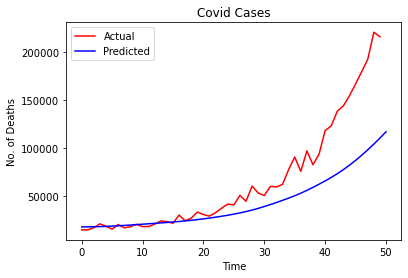

In [28]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Actual')
plt.plot(test_case_predicted, color = 'blue', label = 'Predicted')
plt.title('Covid Cases')
plt.xlabel('Time')
plt.ylabel('No. of Deaths')
plt.legend()
plt.show()

## No of Death Rates for 31st July